# ALL Imports

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# TASK 1: Sentiment Analysis

In [2]:
# TASK 1: Sentiment Labeling ONLY

# Load dataset
df = pd.read_csv('test(in).csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_label(text):
    """
    Function to get sentiment label using VADER
    Returns: 'Positive', 'Negative', or 'Neutral'
    """
    if pd.isna(text) or text == '':
        return 'Neutral'
    
    scores = analyzer.polarity_scores(str(text))
    compound_score = scores['compound']
    
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Combine subject and body for sentiment analysis
df['combined_text'] = df['Subject'].fillna('') + ' ' + df['body'].fillna('')

# Apply sentiment labeling
df['sentiment'] = df['combined_text'].apply(get_sentiment_label)

print("✅ Task 1 Complete: Sentiment labels added")
print(f"Dataset now has {len(df)} labeled messages")

# Show sentiment distribution
print(f"\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Show first 5 labeled examples
print(f"\nFirst 5 labeled messages:")
for i in range(5):
    print(f"{i+1}. Subject: {df.iloc[i]['Subject']}")
    print(f"   Sentiment: {df.iloc[i]['sentiment']}")
    print()

✅ Task 1 Complete: Sentiment labels added
Dataset now has 2191 labeled messages

Sentiment Distribution:
sentiment
Positive    1574
Neutral      444
Negative     173
Name: count, dtype: int64

First 5 labeled messages:
1. Subject: EnronOptions Update!
   Sentiment: Positive

2. Subject: (No Subject)
   Sentiment: Positive

3. Subject: Phone Screen  Interview - Shannon L. Burnham
   Sentiment: Neutral

4. Subject: RE: My new work email
   Sentiment: Neutral

5. Subject: Bet
   Sentiment: Positive



# TASK 2: Exploratory Data Analysis (EDA)

🔍 TASK 2: EXPLORATORY DATA ANALYSIS
Created folder: 'visualizations'

📊 1. DATASET STRUCTURE
-------------------------
Dataset Shape: (2191, 14)
Number of Records: 2191
Number of Columns: 14

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Subject                         2191 non-null   object        
 1   body                            2191 non-null   object        
 2   date                            2191 non-null   datetime64[ns]
 3   from                            2191 non-null   object        
 4   combined_text                   2191 non-null   object        
 5   sentiment                       2191 non-null   object        
 6   score                           2191 non-null   int64         
 7   date_parsed                     2191 non-null   datetime64[ns]
 

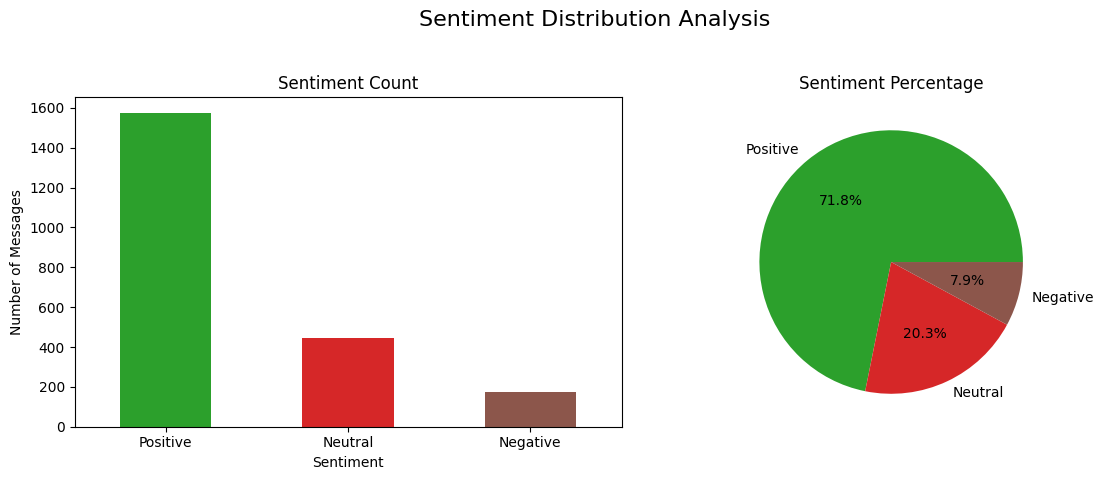


📊 4. SENTIMENT TRENDS OVER TIME
--------------------
Saved chart to 'visualizations/sentiment_trends_over_time.png'


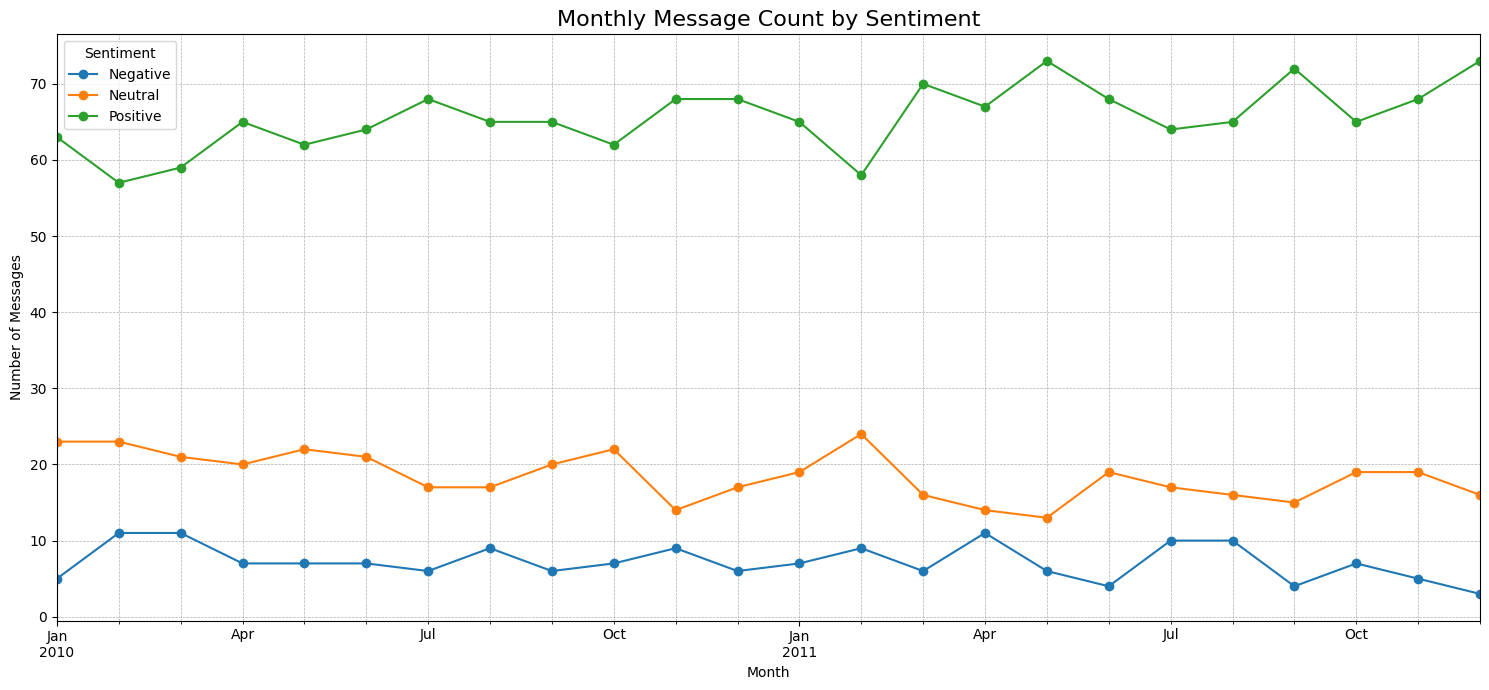


✅ TASK 2 COMPLETE: Basic EDA Finished


In [8]:
# TASK 2: Exploratory Data Analysis (EDA) - Simple Version
# --- UPDATED TO SAVE VISUALIZATIONS ---

import matplotlib.pyplot as plt
import seaborn as sns
import os # Import the os module to handle folder creation

print("🔍 TASK 2: EXPLORATORY DATA ANALYSIS")
print("=" * 40)

# --- Create visualizations folder if it doesn't exist ---
viz_folder = 'visualizations'
if not os.path.exists(viz_folder):
    os.makedirs(viz_folder)
    print(f"Created folder: '{viz_folder}'")
# --------------------------------------------------------

# 1. OVERALL DATA STRUCTURE
print("\n📊 1. DATASET STRUCTURE")
print("-" * 25)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Records: {len(df)}")
print(f"Number of Columns: {len(df.columns)}")

print(f"\nColumn Information:")
# Use df.info(verbose=False) to keep the output cleaner in the final notebook
df.info()

print(f"\nMissing Values:")
print(df.isnull().sum())

# 2. SENTIMENT DISTRIBUTION
print("\n📈 2. SENTIMENT DISTRIBUTION")
print("-" * 30)

# Count and percentages
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = df['sentiment'].value_counts(normalize=True) * 100

print("Sentiment Distribution:")
for sentiment, count in sentiment_counts.items():
   percentage = sentiment_percentages[sentiment]
   print(f"{sentiment}: {count} messages ({percentage:.1f}%)")

# 3. VISUALIZATIONS
print("\n📊 3. VISUALIZATIONS (DISTRIBUTION)")
print("-" * 20)

# Create two simple visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Sentiment Distribution Analysis', fontsize=16)

# Bar chart
sentiment_counts.plot(kind='bar', ax=axes[0], color=['#2ca02c', '#d62728', '#8c564b']) # More distinct colors
axes[0].set_title('Sentiment Count')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Number of Messages')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
sentiment_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['#2ca02c', '#d62728', '#8c564b'])
axes[1].set_title('Sentiment Percentage')
axes[1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle

# --- Save the distribution figure ---
plt.savefig(os.path.join(viz_folder, 'sentiment_distribution_charts.png'))
print(f"\nSaved chart to '{viz_folder}/sentiment_distribution_charts.png'")
# ------------------------------------
plt.show()


# 4. TRENDS OVER TIME (NEW VISUALIZATION)
print("\n📊 4. SENTIMENT TRENDS OVER TIME")
print("-" * 20)

# Ensure date is in datetime format for this analysis
df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date_parsed'].dt.to_period('M')

# Group by month and sentiment to get counts
sentiment_over_time = df.groupby(['year_month', 'sentiment']).size().unstack(fill_value=0)

# Create the time-series plot
plt.figure(figsize=(15, 7))
sentiment_over_time.plot(kind='line', ax=plt.gca(), marker='o', linestyle='-')
plt.title('Monthly Message Count by Sentiment', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Sentiment')
plt.tight_layout()

# --- Save the trends figure ---
plt.savefig(os.path.join(viz_folder, 'sentiment_trends_over_time.png'))
print(f"Saved chart to '{viz_folder}/sentiment_trends_over_time.png'")
# --------------------------------
plt.show()


print("\n✅ TASK 2 COMPLETE: Basic EDA Finished")

# TASK 3: Employee Score Calculation


In [ ]:
# TASK 3: Employee Score Calculation


print("📊 TASK 3: EMPLOYEE SCORE CALCULATION")
print("=" * 40)

# 1. ASSIGN SCORES TO MESSAGES
print("\n1. Assigning Scores to Messages")
print("-" * 30)

# Create score mapping
def assign_score(sentiment):
   if sentiment == 'Positive':
       return +1
   elif sentiment == 'Negative':
       return -1
   else:  # Neutral
       return 0

# Apply scoring
df['score'] = df['sentiment'].apply(assign_score)

# Show score distribution
score_counts = df['score'].value_counts().sort_index()
print("Score Distribution:")
for score, count in score_counts.items():
   sentiment_type = {1: 'Positive', -1: 'Negative', 0: 'Neutral'}[score]
   print(f"Score {score:+2d} ({sentiment_type}): {count} messages")

# 2. PREPARE DATE FOR MONTHLY GROUPING
print("\n2. Preparing Monthly Grouping")
print("-" * 30)

# Convert date to datetime
df['date_parsed'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['year_month'] = df['date_parsed'].dt.to_period('M')

print(f"Date range: {df['date_parsed'].min()} to {df['date_parsed'].max()}")
print(f"Months covered: {df['year_month'].nunique()} months")
print(f"Months: {sorted(df['year_month'].unique())}")

# 3. CALCULATE MONTHLY SCORES FOR EACH EMPLOYEE
print("\n3. Monthly Employee Scores")
print("-" * 30)

# Group by employee and month, sum the scores
monthly_scores = df.groupby(['from', 'year_month'])['score'].sum().reset_index()
monthly_scores.columns = ['employee', 'month', 'monthly_score']

print(f"Total employee-month combinations: {len(monthly_scores)}")
print("\nSample monthly scores:")
print(monthly_scores.head(10))

# Show monthly score statistics
print(f"\nMonthly Score Statistics:")
print(f"Average monthly score: {monthly_scores['monthly_score'].mean():.2f}")
print(f"Highest monthly score: {monthly_scores['monthly_score'].max()}")
print(f"Lowest monthly score: {monthly_scores['monthly_score'].min()}")


📊 TASK 3: EMPLOYEE SCORE CALCULATION

1. Assigning Scores to Messages
------------------------------
Score Distribution:
Score -1 (Negative): 173 messages
Score +0 (Neutral): 444 messages
Score +1 (Positive): 1574 messages

2. Preparing Monthly Grouping
------------------------------
Date range: 2010-01-01 00:00:00 to 2011-12-31 00:00:00
Months covered: 24 months
Months: [Period('2010-01', 'M'), Period('2010-02', 'M'), Period('2010-03', 'M'), Period('2010-04', 'M'), Period('2010-05', 'M'), Period('2010-06', 'M'), Period('2010-07', 'M'), Period('2010-08', 'M'), Period('2010-09', 'M'), Period('2010-10', 'M'), Period('2010-11', 'M'), Period('2010-12', 'M'), Period('2011-01', 'M'), Period('2011-02', 'M'), Period('2011-03', 'M'), Period('2011-04', 'M'), Period('2011-05', 'M'), Period('2011-06', 'M'), Period('2011-07', 'M'), Period('2011-08', 'M'), Period('2011-09', 'M'), Period('2011-10', 'M'), Period('2011-11', 'M'), Period('2011-12', 'M')]

3. Monthly Employee Scores
---------------------

# TASK 4: Employee Ranking 

In [5]:
# TASK 4: Employee Ranking ONLY


print(" TASK 4: EMPLOYEE RANKING")
print("=" * 30)

# Get unique months
months = monthly_scores['month'].unique()

print(f"Generating rankings for {len(months)} months")

# Process each month
for month in sorted(months):
   month_data = monthly_scores[monthly_scores['month'] == month]
   
   print(f"\n MONTH: {month}")
   print("-" * 20)
   
   # Top 3 Positive Employees (highest scores)
   top_positive = month_data.nlargest(3, 'monthly_score')
   # Sort by score (desc) then alphabetically by name
   top_positive = top_positive.sort_values(['monthly_score', 'employee'], ascending=[False, True])
   
   print(" TOP 3 POSITIVE EMPLOYEES:")
   for i, (_, row) in enumerate(top_positive.iterrows(), 1):
       print(f"  {i}. {row['employee']} (Score: {row['monthly_score']:+d})")
   
   # Top 3 Negative Employees (lowest scores)
   top_negative = month_data.nsmallest(3, 'monthly_score')
   # Sort by score (asc) then alphabetically by name
   top_negative = top_negative.sort_values(['monthly_score', 'employee'], ascending=[True, True])
   
   print(" TOP 3 NEGATIVE EMPLOYEES:")
   for i, (_, row) in enumerate(top_negative.iterrows(), 1):
       print(f"  {i}. {row['employee']} (Score: {row['monthly_score']:+d})")

print("\n TASK 4 COMPLETE: Employee rankings generated")

 TASK 4: EMPLOYEE RANKING
Generating rankings for 24 months

 MONTH: 2010-01
--------------------
 TOP 3 POSITIVE EMPLOYEES:
  1. kayne.coulter@enron.com (Score: +14)
  2. eric.bass@enron.com (Score: +9)
  3. lydia.delgado@enron.com (Score: +9)
 TOP 3 NEGATIVE EMPLOYEES:
  1. bobette.riner@ipgdirect.com (Score: +1)
  2. rhonda.denton@enron.com (Score: +1)
  3. sally.beck@enron.com (Score: +2)

 MONTH: 2010-02
--------------------
 TOP 3 POSITIVE EMPLOYEES:
  1. john.arnold@enron.com (Score: +12)
  2. johnny.palmer@enron.com (Score: +10)
  3. bobette.riner@ipgdirect.com (Score: +8)
 TOP 3 NEGATIVE EMPLOYEES:
  1. kayne.coulter@enron.com (Score: -1)
  2. lydia.delgado@enron.com (Score: +1)
  3. patti.thompson@enron.com (Score: +1)

 MONTH: 2010-03
--------------------
 TOP 3 POSITIVE EMPLOYEES:
  1. sally.beck@enron.com (Score: +11)
  2. john.arnold@enron.com (Score: +7)
  3. eric.bass@enron.com (Score: +6)
 TOP 3 NEGATIVE EMPLOYEES:
  1. rhonda.denton@enron.com (Score: +1)
  2. don.baug

# TASK 5: Flight Risk Identification

In [ ]:
# TASK 5: Flight Risk Identification


try:
    df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')
except KeyError:
   
    if 'date' in df.columns and df['date'].dtype != '<M8[ns]': # Check if not already datetime
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where date conversion might have failed (resulting in NaT)
df.dropna(subset=['date'], inplace=True)

# Filter for negative emails
negative_emails_df = df[df['sentiment'] == 'Negative'].copy() # Use .copy() to avoid potential SettingWithCopyWarning

flight_risk_employees = set()

# Get unique employee emails from those who sent negative emails
employees_with_negative_mail = negative_emails_df['from'].unique()

for employee_email in employees_with_negative_mail:
    # Get all negative emails for this specific employee
    emp_neg_df = negative_emails_df[negative_emails_df['from'] == employee_email]
    
    # Sort these emails by date
    emp_neg_df_sorted = emp_neg_df.sort_values(by='date')
    
    # If the employee has sent fewer than 4 negative emails, they can't meet the criteria
    if len(emp_neg_df_sorted) < 4:
        continue
        
    
    for i in range(len(emp_neg_df_sorted) - 3):
        first_email_date = emp_neg_df_sorted.iloc[i]['date']
        fourth_email_date = emp_neg_df_sorted.iloc[i+3]['date']
        
        time_difference = fourth_email_date - first_email_date
        
        # A span of 30 days. E.g., Jan 1 to Jan 30 is 29 days difference.
        if time_difference <= pd.Timedelta(days=29): 
            flight_risk_employees.add(employee_email)
            break # Employee identified as flight risk, no need to check further for this employee

# Convert the set to a list for the final output
flight_risk_employees_list = sorted(list(flight_risk_employees))

print("\n✅ Task 5 Complete: Flight Risk Identification")
if flight_risk_employees_list:
    print(f"\nEmployees identified as flight risk ({len(flight_risk_employees_list)}):")
    for emp in flight_risk_employees_list:
        print(f"- {emp}")
else:
    print("\nNo employees identified as flight risk based on the criteria.")

# Optional: Display some details for verification for one of the flagged employees
if flight_risk_employees_list:
    example_employee = flight_risk_employees_list[0]
    print(f"\nExample: Negative email dates for flight risk employee {example_employee}:")
    example_emp_neg_df = negative_emails_df[negative_emails_df['from'] == example_employee].sort_values(by='date')
    
    
    found_trigger_window = False
    for i in range(len(example_emp_neg_df) - 3):
        window_dates = example_emp_neg_df.iloc[i:i+4]['date'].tolist()
        first_email_date_check = window_dates[0]
        fourth_email_date_check = window_dates[3]
        if (fourth_email_date_check - first_email_date_check) <= pd.Timedelta(days=29):
            print(f"  Triggering window of 4 negative emails:")
            for k_idx, date_in_window in enumerate(window_dates):
                 print(f"    Email {k_idx+1}: {date_in_window.strftime('%Y-%m-%d')}")
            print(f"    Span: {(fourth_email_date_check - first_email_date_check).days + 1} days") # +1 to make span inclusive
            found_trigger_window = True
            # break # Show first trigger window, or remove break to show all
    if not found_trigger_window:
        print(f"  Could not find a specific triggering window for {example_employee} with current logic (should not happen if flagged).")


✅ Task 5 Complete: Flight Risk Identification

Employees identified as flight risk (7):
- bobette.riner@ipgdirect.com
- eric.bass@enron.com
- john.arnold@enron.com
- johnny.palmer@enron.com
- kayne.coulter@enron.com
- patti.thompson@enron.com
- sally.beck@enron.com

Example: Negative email dates for flight risk employee bobette.riner@ipgdirect.com:
  Triggering window of 4 negative emails:
    Email 1: 2011-03-26
    Email 2: 2011-04-01
    Email 3: 2011-04-04
    Email 4: 2011-04-17
    Span: 23 days


# TASK 6: Predictive Modeling

In [7]:
# TASK 6: Predictive Modeling
print("🔍 TASK 6: PREDICTIVE MODELING")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_compound_score(text):
    if pd.isna(text) or text == '':
        return 0.0 # Neutral or handle as NaN
    return analyzer.polarity_scores(str(text))['compound']

# Calculate compound sentiment score (our target variable)
df['compound_score'] = df['combined_text'].apply(get_compound_score)

# Feature Engineering
# 1. Message Length
df['message_length'] = df['combined_text'].apply(lambda x: len(str(x)))

# 2. Word Count
df['word_count'] = df['combined_text'].apply(lambda x: len(str(x).split()))

# Ensure 'date' is datetime and handle potential NaNs from previous steps
if df['date'].dtype != '<M8[ns]':
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dropna(subset=['date'], inplace=True) # Drop rows if date conversion failed

# 3. Message Frequency in a Month (per employee)
df['year_month'] = df['date'].dt.to_period('M')
df['monthly_frequency'] = df.groupby(['from', 'year_month'])['date'].transform('count')

# 4. Average Message Length (per employee per month)
# This uses 'message_length' calculated above
df['average_monthly_message_length'] = df.groupby(['from', 'year_month'])['message_length'].transform('mean')

# Select features and target
feature_columns = ['message_length', 'word_count', 'monthly_frequency', 'average_monthly_message_length']
target_column = 'compound_score'

# Create X and y
X = df[feature_columns]
y = df[target_column]

# Data Cleaning for the model
# Combine X and y for easy NaN dropping across relevant columns
model_data = pd.concat([X, y], axis=1)
model_data.dropna(inplace=True) # Drop rows with NaN in any of the selected features or target

# Separate X and y again after dropping NaNs
X = model_data[feature_columns]
y = model_data[target_column]

print(f"Dataset for modeling has {len(X)} samples after cleaning.")

if len(X) < 2: # Need at least 2 samples to train/test
    print("Not enough data to build a model after cleaning. Exiting Task 6.")
else:
    # Split data into training and testing sets
    # Test size 20% and random_state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

    # Develop Linear Regression Model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linear_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("\n✅ Task 6 Complete: Predictive Modeling")
    print("\nModel Evaluation Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared (R²): {r2:.4f}")

    # Interpret model results
    print("\nModel Interpretation:")
    print(f"  Intercept: {linear_model.intercept_:.4f}")
    coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])
    print("  Coefficients:")
    print(coefficients)

    print("\nDiscussion of Findings:")
    print("The linear regression model was trained to predict sentiment compound scores based on message length, word count, monthly message frequency per employee, and average monthly message length per employee.")
    print(f"The R-squared value of {r2:.4f} indicates that approximately {r2*100:.2f}% of the variance in sentiment scores can be explained by the selected features.")
    
    if r2 < 0.1:
        print("An R-squared value this low suggests that the chosen features have very limited predictive power for sentiment scores in this linear model context.")
    elif r2 < 0.5:
        print("This R-squared value suggests a weak to moderate linear relationship between the features and sentiment scores.")
    else:
        print("This R-squared value suggests a moderate to strong linear relationship.")

    print("\nIndividual coefficient insights:")
    for feature, row in coefficients.iterrows():
        coeff_val = row['Coefficient']
        if coeff_val > 0:
            interpretation = f"A one-unit increase in '{feature}' is associated with an increase of {coeff_val:.4f} in the sentiment compound score, holding other features constant."
        elif coeff_val < 0:
            interpretation = f"A one-unit increase in '{feature}' is associated with a decrease of {abs(coeff_val):.4f} in the sentiment compound score, holding other features constant."
        else:
            interpretation = f"'{feature}' has no linear association with the sentiment compound score in this model."
        print(f"- {feature}: {coeff_val:.4f}. {interpretation}")
    
    print("\nNote: Message length and word count are often highly correlated. High correlation (multicollinearity) can make individual coefficient interpretations less reliable, though it may not degrade the overall predictive accuracy of the model.")
    print("The significance of these findings would ideally be further tested using p-values for coefficients (e.g., using statsmodels library), which provide evidence on whether these relationships are statistically significant or likely due to chance.")
    print("Given the typically complex nature of sentiment, a linear model with these features might be too simplistic. More advanced models or features (like specific word embeddings, n-grams) might be necessary for better predictive performance.")

🔍 TASK 6: PREDICTIVE MODELING
Dataset for modeling has 2191 samples after cleaning.
Training set size: 1752
Testing set size: 439

✅ Task 6 Complete: Predictive Modeling

Model Evaluation Metrics:
  Mean Squared Error (MSE): 0.1556
  Root Mean Squared Error (RMSE): 0.3944
  Mean Absolute Error (MAE): 0.3206
  R-squared (R²): 0.1514

Model Interpretation:
  Intercept: 0.3335
  Coefficients:
                                Coefficient
message_length                     0.000205
word_count                         0.003331
monthly_frequency                 -0.001286
average_monthly_message_length    -0.000320

Discussion of Findings:
The linear regression model was trained to predict sentiment compound scores based on message length, word count, monthly message frequency per employee, and average monthly message length per employee.
The R-squared value of 0.1514 indicates that approximately 15.14% of the variance in sentiment scores can be explained by the selected features.
This R-squared